In [1]:
!pip install -U gplearn --quiet
!pip install -U graphviz --quiet

     |████████████████████████████████| 41 kB 255 kB/s 


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
def func(x0, x1):
    return x0**3  + np.cos(x0) - x1**2 + np.cos(x1) + x1 - 1

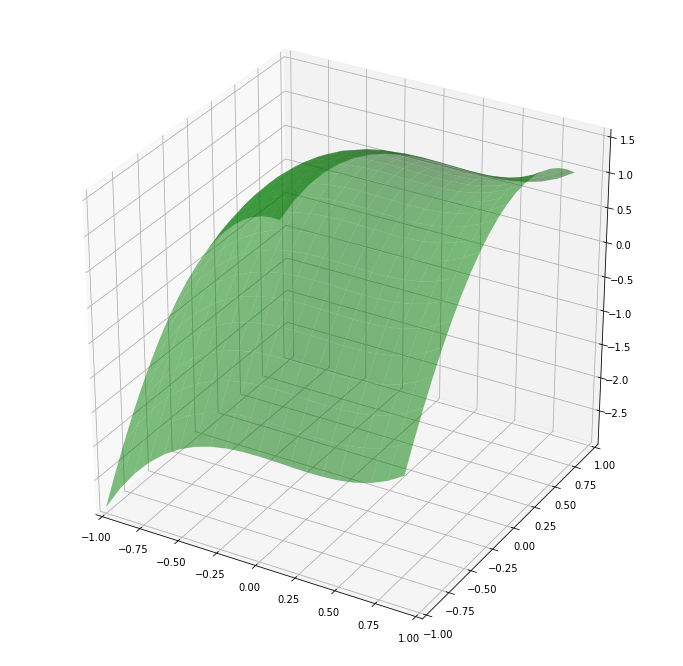

In [32]:
x0 = np.arange(-1, 1, .1)
x1 = np.arange(-1, 1, .1)
x0, x1 = np.meshgrid(x0, x1)
y_truth = func(x0, x1)

ax = plt.figure(figsize=(12, 12)).gca(projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
surf = ax.plot_surface(x0, x1, y_truth, rstride=1, cstride=1,
                       color='green', alpha=0.5)
plt.show()

In [36]:
from sklearn.utils import check_random_state

rng = check_random_state(0)

# Training samples
X_train = rng.uniform(-1, 1, 200).reshape(100, 2)
y_train = func(X_train[:, 0], X_train[:, 1])

# Validation samples
X_valid = rng.uniform(-1, 1, 100).reshape(50, 2)
y_valid = func(X_valid[:, 0], X_valid[:, 1])

# Testing samples
X_test = rng.uniform(-1, 1, 100).reshape(50, 2)
y_test = func(X_test[:, 0], X_test[:, 1])

In [37]:
from gplearn.genetic import SymbolicRegressor

function_set = ['add', 'sub', 'mul', 'div',]

est_gp = SymbolicRegressor(
    population_size=5000,
     function_set=function_set,
     generations=20, 
     stopping_criteria=0.01,
     p_crossover=0.7, 
     p_subtree_mutation=0.1,
     p_hoist_mutation=0.05,
      p_point_mutation=0.1,
      max_samples=0.5, 
      verbose=1,
      parsimony_coefficient=0.01, 
      random_state=0, 
      n_jobs=-1)

est_gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    38.13      3.13332e+07        5          0.37683          0.41467      2.43m
   1     8.43          5.62935       13         0.260693         0.233549      2.64m
   2     5.94          1.45727       15         0.218294         0.332588      2.40m
   3     6.17          2.65503       13         0.192339         0.301904      2.19m
   4     6.70         0.906339       13         0.188955         0.305287      2.17m
   5     7.68          3.29296       13         0.191014         0.303228      2.05m
   6     9.85           1.8053       13          0.18556         0.308682      1.87m
   7    11.78          2.12899       13         0.187866         0.306376      1.85m
   8    11.77          1.91646       13         0.190161         0.304081  

SymbolicRegressor(const_range=(-1.0, 1.0), feature_names=None,
                  function_set=['add', 'sub', 'mul', 'div'], generations=20,
                  init_depth=(2, 6), init_method='half and half',
                  low_memory=False, max_samples=0.5,
                  metric='mean absolute error', n_jobs=-1, p_crossover=0.7,
                  p_hoist_mutation=0.05, p_point_mutation=0.1,
                  p_point_replace=0.05, p_subtree_mutation=0.1,
                  parsimony_coefficient=0.01, population_size=5000,
                  random_state=0, stopping_criteria=0.01, tournament_size=20,
                  verbose=1, warm_start=False)

In [38]:
print(est_gp._program)

add(0.521, sub(add(X0, X1), mul(add(mul(add(0.923, X0), mul(X1, X1)), X0), mul(X1, X1))))


In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

est_tree = DecisionTreeRegressor()
est_tree.fit(X_train, y_train)
est_rf = RandomForestRegressor()
est_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [45]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras import optimizers

model = Sequential()
model.add(Dense(512, input_shape=(2,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

rms = optimizers.RMSprop(learning_rate=0.01, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(loss='mean_squared_error', optimizer=rms, metrics=['mse'])

est_mlp = model
est_mlp.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=1_000, verbose=50)

Epoch 1/1000
Epoch 2/1000
Epoch 3/1000
Epoch 4/1000
Epoch 5/1000
Epoch 6/1000
Epoch 7/1000
Epoch 8/1000
Epoch 9/1000
Epoch 10/1000
Epoch 11/1000
Epoch 12/1000
Epoch 13/1000
Epoch 14/1000
Epoch 15/1000
Epoch 16/1000
Epoch 17/1000
Epoch 18/1000
Epoch 19/1000
Epoch 20/1000
Epoch 21/1000
Epoch 22/1000
Epoch 23/1000
Epoch 24/1000
Epoch 25/1000
Epoch 26/1000
Epoch 27/1000
Epoch 28/1000
Epoch 29/1000
Epoch 30/1000
Epoch 31/1000
Epoch 32/1000
Epoch 33/1000
Epoch 34/1000
Epoch 35/1000
Epoch 36/1000
Epoch 37/1000
Epoch 38/1000
Epoch 39/1000
Epoch 40/1000
Epoch 41/1000
Epoch 42/1000
Epoch 43/1000
Epoch 44/1000
Epoch 45/1000
Epoch 46/1000
Epoch 47/1000
Epoch 48/1000
Epoch 49/1000
Epoch 50/1000
Epoch 51/1000
Epoch 52/1000
Epoch 53/1000
Epoch 54/1000
Epoch 55/1000
Epoch 56/1000
Epoch 57/1000
Epoch 58/1000
Epoch 59/1000
Epoch 60/1000
Epoch 61/1000
Epoch 62/1000
Epoch 63/1000
Epoch 64/1000
Epoch 65/1000
Epoch 66/1000
Epoch 67/1000
Epoch 68/1000
Epoch 69/1000
Epoch 70/1000
Epoch 71/1000
Epoch 72/1000
E

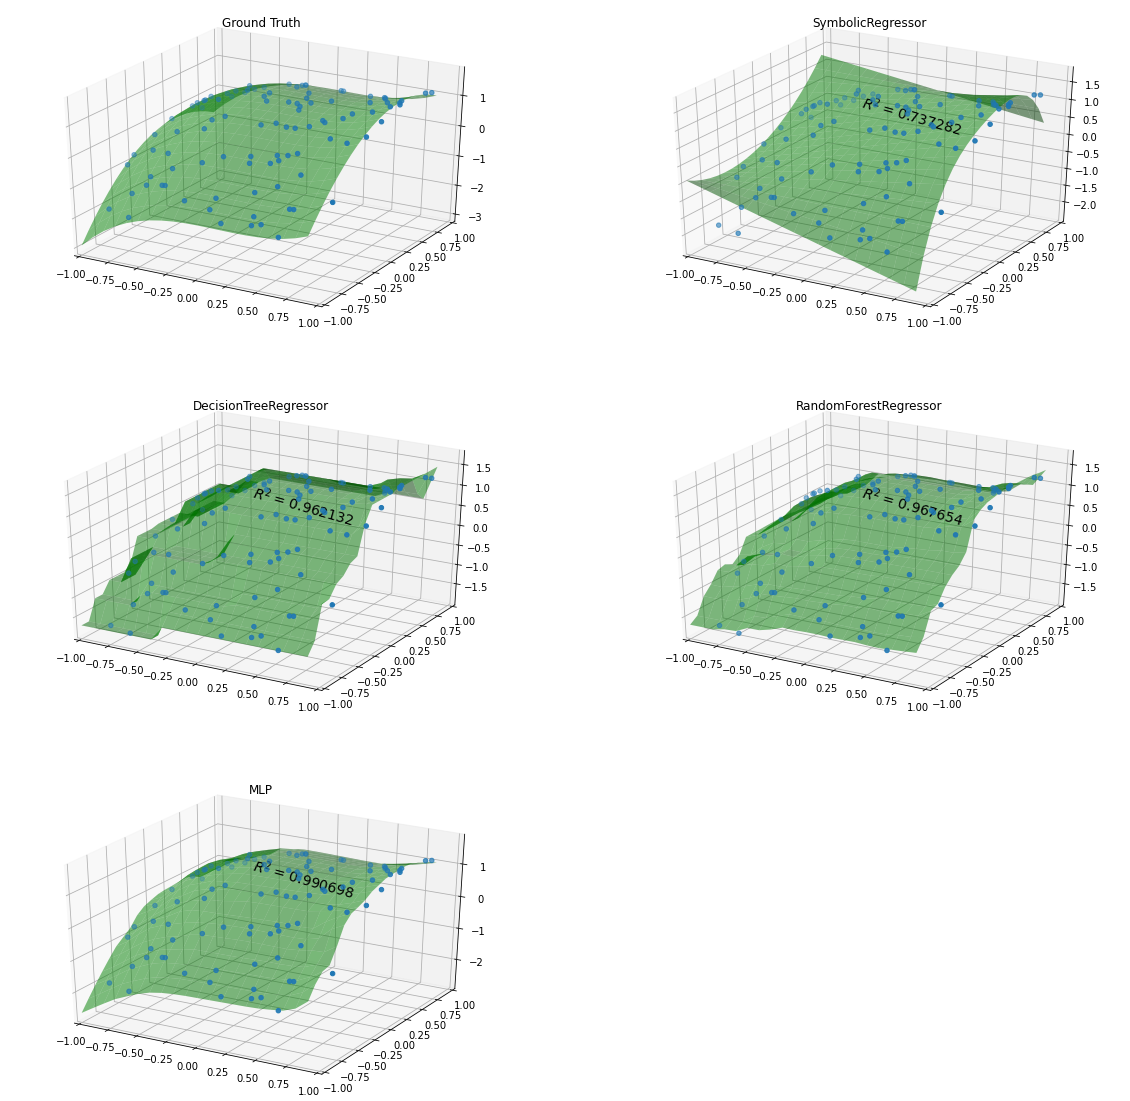

In [46]:
from sklearn.metrics import r2_score

y_gp = est_gp.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
score_gp = est_gp.score(X_test, y_test)
y_tree = est_tree.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
score_tree = est_tree.score(X_test, y_test)
y_rf = est_rf.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
score_rf = est_rf.score(X_test, y_test)
y_mlp = est_mlp.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
score_mlp = r2_score(y_test, est_mlp.predict(X_test))

fig = plt.figure(figsize=(20, 20))

for i, (y, score, title) in enumerate([(y_truth, None, "Ground Truth"),
                                       (y_gp, score_gp, "SymbolicRegressor"),
                                       (y_tree, score_tree, "DecisionTreeRegressor"),
                                       (y_rf, score_rf, "RandomForestRegressor"), 
                                       (y_mlp, score_mlp, "MLP")]):

    ax = fig.add_subplot(3, 2, i+1, projection='3d')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    surf = ax.plot_surface(x0, x1, y, rstride=1, cstride=1, color='green', alpha=0.5)
    points = ax.scatter(X_train[:, 0], X_train[:, 1], y_train)
    if score is not None:
        score = ax.text(-.2, .1, .2, "$R^2 =\/ %.6f$" % score, 'x', fontsize=14)
    plt.title(title)
plt.show()

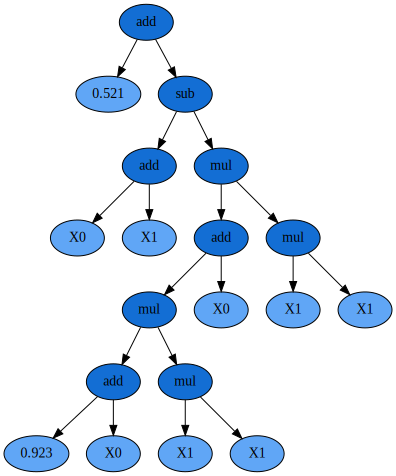

In [47]:
import graphviz

dot_data = est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph

In [48]:
from gplearn.genetic import SymbolicTransformer

function_set = ['add', 'sub', 'mul', 'div']

gp = SymbolicTransformer(generations=20, population_size=2000,
                         hall_of_fame=100, n_components=1,
                         function_set=function_set,
                         parsimony_coefficient=0.0005,
                         max_samples=0.9, verbose=1,
                         random_state=0, n_jobs=-1)

gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    36.70         0.208896       15         0.951137         0.962438      1.25m
   1    12.65         0.538784       11         0.963101         0.948997      1.11m
   2    12.72         0.647028       11         0.969285         0.917157      1.12m
   3    15.36         0.699666       15         0.975629         0.937661      1.22m
   4    16.49         0.732418       33         0.981489           0.9821      1.03m
   5    16.54         0.746374       33         0.981652         0.981379     57.96s
   6    16.31         0.749111       33         0.982698         0.962901     53.68s
   7    15.82         0.759815       33         0.982223         0.992448     54.81s
   8    15.42         0.742409       43         0.981452         0.985783  

KeyboardInterrupt: ignored

In [ ]:
gp_features = gp.transform(X_train)
new_X_train = np.hstack((X_train, gp_features))

In [ ]:
est_gp = SymbolicRegressor(population_size=5000, function_set=function_set,
                           generations=20, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0, n_jobs=-1)
est_gp.fit(new_X_train, y_train)

In [ ]:
print(est_gp._program)